In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [65]:
df= pd.read_csv("ford.csv")

In [66]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [67]:
df.shape

(17966, 9)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [69]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [70]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


<Axes: xlabel='price', ylabel='Count'>

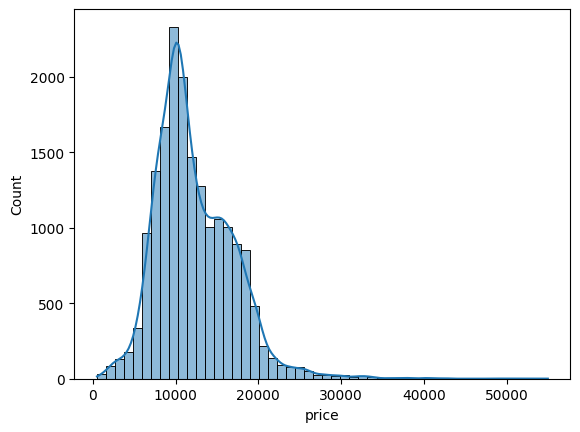

In [71]:
sns.histplot(df['price'],bins=50,kde='true')

<Axes: >

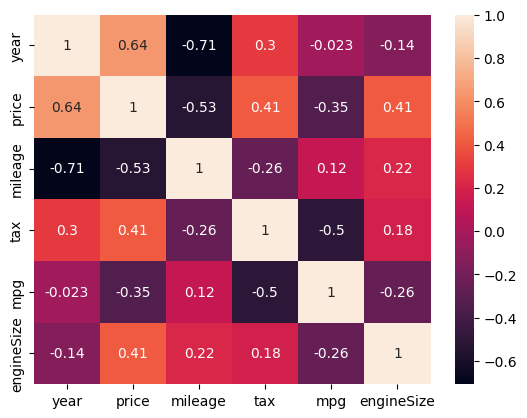

In [72]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '2000'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018'),
  Text(20, 0, '2019'),
  Text(21, 0, '2020'),
  Text(22, 0, '2060')])

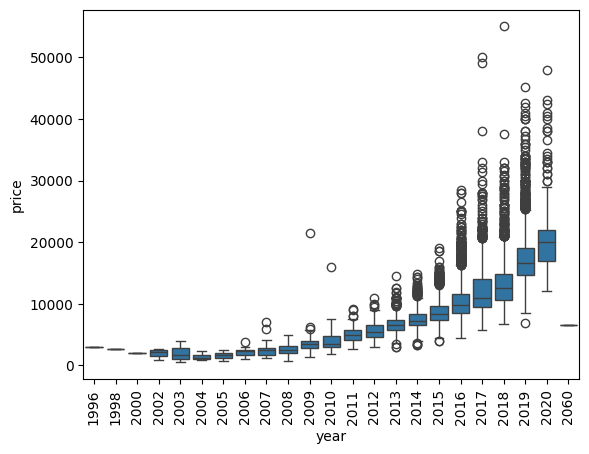

In [73]:
sns.boxplot(data=df,x='year',y='price')
plt.xticks(rotation=90)

<Axes: xlabel='mileage', ylabel='price'>

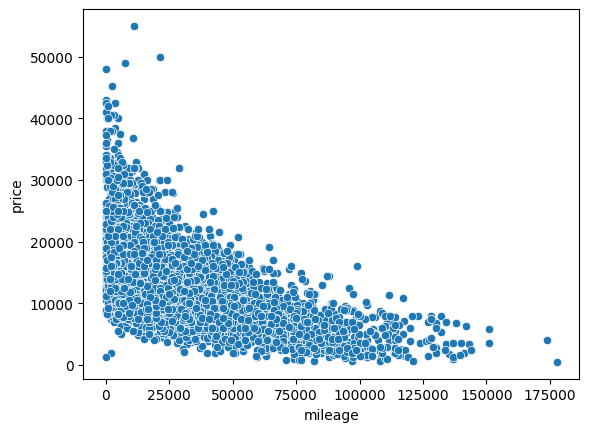

In [74]:
sns.scatterplot(data=df,x='mileage',y='price')

<Axes: xlabel='engineSize', ylabel='price'>

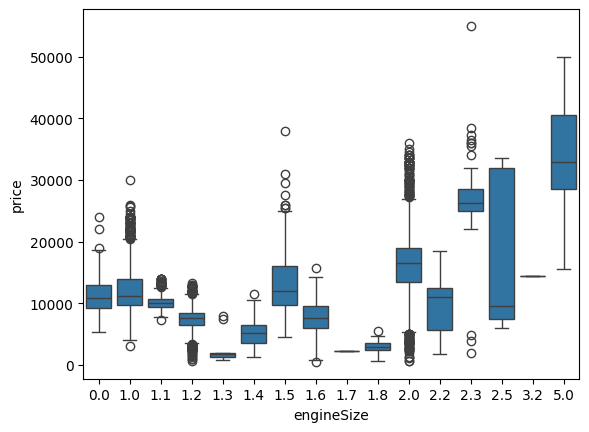

In [75]:
sns.boxplot(data=df,x='engineSize',y='price')

In [76]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='transmission', ylabel='price'>

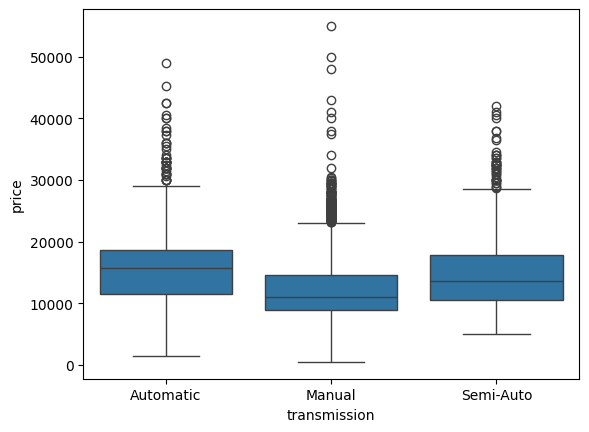

In [77]:
sns.boxplot(data=df,x='transmission',y='price')

<Axes: xlabel='fuelType', ylabel='price'>

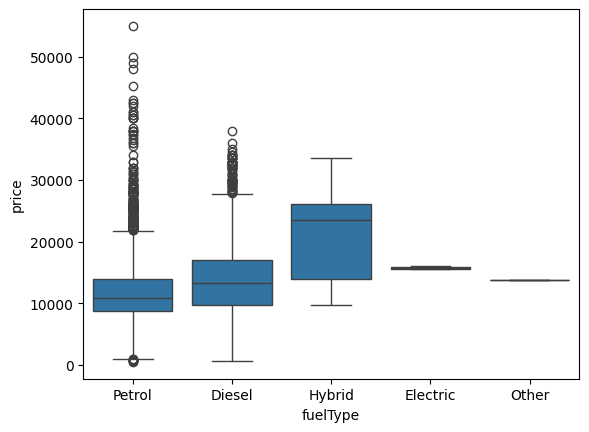

In [78]:
sns.boxplot(data=df,x='fuelType',y='price')

<Axes: xlabel='mpg', ylabel='price'>

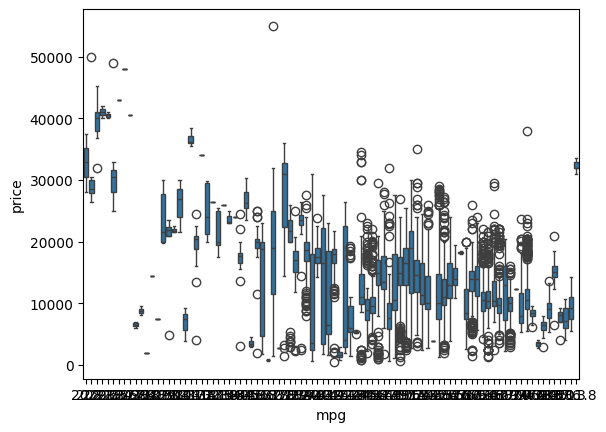

In [79]:
sns.boxplot(data=df,x='mpg',y='price')


<Axes: xlabel='tax', ylabel='price'>

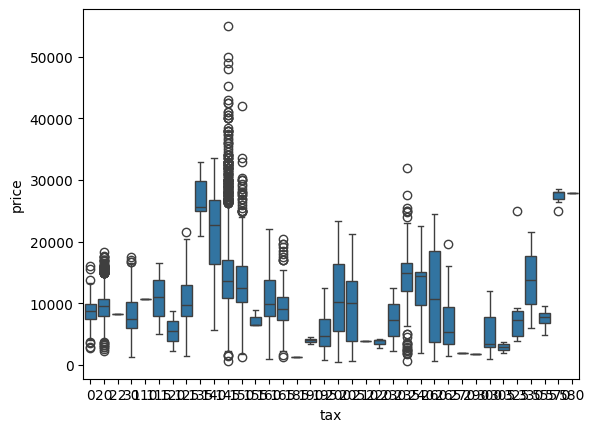

In [80]:
sns.boxplot(data=df,x='tax',y='price')

<Axes: xlabel='model', ylabel='price'>

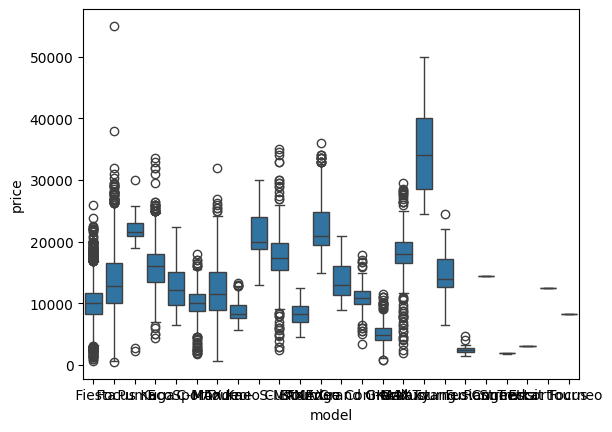

In [81]:
sns.boxplot(data=df,x='model',y='price')

In [82]:
X=df.drop(columns=['price'],axis=1)
y=df['price']

In [83]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [84]:
X_one_encode=pd.get_dummies(X,columns=['model','transmission','fuelType'],drop_first=True)

In [85]:
X_one_encode.columns = X_one_encode.columns.str.replace(' ', '')

In [86]:
X_one_encode=X_one_encode.astype(int)

In [87]:
X_one_encode

,year,mileage,tax,mpg,engineSize,model_C-MAX,model_EcoSport,model_Edge,model_Escort,model_Fiesta,...,model_TourneoConnect,model_TourneoCustom,model_TransitTourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [88]:
from sklearn.preprocessing import LabelEncoder
encode= LabelEncoder()
columns=['model','transmission','fuelType']

Xlabel=X
for i in columns:
    Xlabel[i]=encode.fit_transform(Xlabel[i])

In [89]:
Xlabel

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17961,0,2017,1,16700,4,150,47.1,1.4
17962,0,2014,1,40700,4,30,57.7,1.0
17963,6,2015,1,7010,0,20,67.3,1.6
17964,11,2018,1,5007,4,145,57.7,1.2


In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
numeric_cols=['year','mileage','tax','mpg','engineSize']
Scaler=StandardScaler()
X_one_encode[numeric_cols]=Scaler.fit_transform(X_one_encode[numeric_cols])

In [92]:
X_one_encode

,year,mileage,tax,mpg,engineSize,model_C-MAX,model_EcoSport,model_Edge,model_Escort,model_Fiesta,...,model_TourneoConnect,model_TourneoCustom,model_TransitTourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,-0.342172,0.591358,-1.029814,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.398088,0.890398,-1.343791,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.910349,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.552866,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [93]:
import joblib

joblib.dump(Scaler, 'Scaler.pkl')
joblib.dump(X_one_encode.columns.tolist(), 'columns.pkl')

['columns.pkl']

In [94]:
X=X_one_encode
y=df['price']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lin_reg=LinearRegression()

In [99]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [100]:
y_pred=lin_reg.predict(X_test)

In [101]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [102]:
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R2 score: 0.8396626991294073
R2: 0.8397
RMSE: 1906.36


In [103]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [104]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [105]:
y_pred_dt=dt.predict(X_test)

In [106]:
r2 = r2_score(y_test, y_pred_dt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R2: 0.8813
RMSE: 1640.40


In [107]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best R2:", random_search.best_score_)


Best Params: {'max_depth': 18, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 15}
Best R2: 0.9146348883522337


In [108]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [109]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [110]:
y_pred_rf=rf.predict(X_test)

In [111]:
r2 = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R2: 0.9180
RMSE: 1363.56


In [112]:
param_dist = {
    'n_estimators': randint(100, 600),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
print("Best CV R2:", random_search.best_score_)

Best Params: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 575}
Best CV R2: 0.9343792221797399


In [113]:
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Test R2: 0.9258688944267975
Test RMSE: 1296.2489340518184


In [114]:
from xgboost import XGBRegressor
from scipy.stats import randint, uniform
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

In [115]:
xgb.fit(X_train.values, y_train.values)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [116]:
y_pred_xgb=xgb.predict(X_test.values)

In [117]:
r2 = r2_score(y_test.values, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R2: 0.9312
RMSE: 1248.34


In [59]:
param_dist = {
    'n_estimators': randint(200, 800),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5)
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
random_search.fit(X_train.values, y_train.values)
print("Best Params:", random_search.best_params_)
print("Best CV R2:", random_search.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Params: {'colsample_bytree': np.float64(0.610167650697638), 'gamma': np.float64(0.053945713496652226), 'learning_rate': np.float64(0.019428755706020276), 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 763, 'subsample': np.float64(0.8253102287905535)}
Best CV R2: 0.9397651195526123


In [121]:
best_xgb = random_search.best_estimator_
y_pred_xgbcv = best_xgb.predict(X_test)
r2 = r2_score(y_test, y_pred_xgbcv)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgbcv))
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

R2: 0.9259
RMSE: 1296.25


In [119]:
joblib.dump(best_xgb, 'xgb.pkl')

['xgb.pkl']

In [120]:
from google.colab import files

files.download('xgb.pkl')
files.download('Scaler.pkl')
files.download('columns.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>